In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Exercise #1: Phone Detection

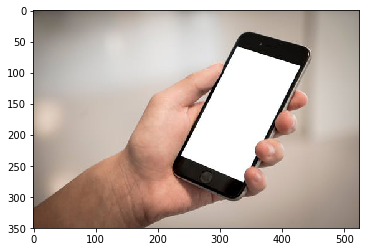

In [31]:
# read in the image
image = cv2.imread('images/hand_phone.jpeg')

# make a copy
image_copy = np.copy(image)

# change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Perform edge detection 

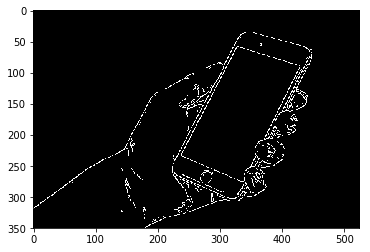

In [32]:
# convert image to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# define our parameters for canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

As you can see, we've detected a lot of smaller discountinous edges. Now, we'll use hough transform to piece these together and form continous lines.

### Hough Transform
The code we are using - a probabilistic Hough transform - is documented, here: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html 

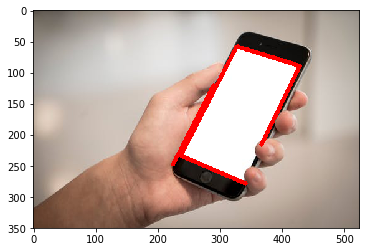

In [36]:
# define the hough transform
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 100
max_line_gap = 8

# find lines using a hough transform
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

line_image = np.copy(image_copy)

# iterate over the output lines and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 5)

plt.imshow(line_image)



# Exercise #2: Lane Detection 

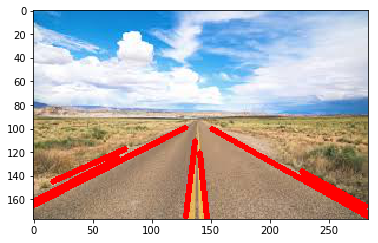

In [23]:
# Read in an image and convert to RGB
image = cv2.imread('images/road_1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Peform edge detection with Canny
low_threshold = 90
high_threshold = 180
edges = cv2.Canny(gray, low_threshold, high_threshold)
# ---------------------------------------------------------- #


## TODO: Define the Hough transform parameters 
## so that lane lines are the only ones detected
rho = 1
theta = np.pi/180
threshold = 50
min_line_length = 55
max_line_gap = 4


line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)

# ---------------------------------------------------------- #
plt.imshow(line_image)

